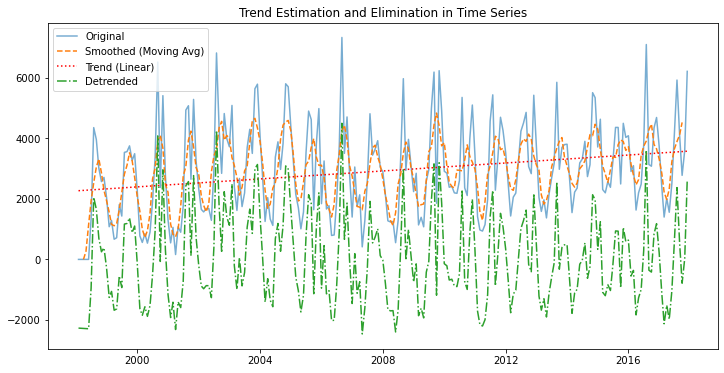

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset with correct file path
df = pd.read_csv("C:/Users/Lenovo/Downloads/amazon.csv", encoding='latin1')

# Mapping Portuguese month names to English
month_map = {
   'Janeiro': 'January', 'Fevereiro': 'February', 'Março': 'March',
   'Abril': 'April', 'Maio': 'May', 'Junho': 'June',
   'Julho': 'July', 'Agosto': 'August', 'Setembro': 'September',
   'Outubro': 'October', 'Novembro': 'November', 'Dezembro': 'December'
}

df['month'] = df['month'].map(month_map)
df['date'] = pd.to_datetime(df['month'] + ' ' + df['year'].astype(str), format='%B %Y', errors='coerce')
df = df.dropna(subset=['date'])
df.set_index('date', inplace=True)

# Aggregate data
df_monthly = df.resample('M')['number'].sum()
df_yearly = df.resample('Y')['number'].sum()

# Moving Average Smoothing (Simple Method)
df_monthly_smooth = df_monthly.rolling(window=5, center=True).mean()

# Detrending using Linear Regression
X = np.arange(len(df_monthly)).reshape(-1, 1)  # Time index as X
y = df_monthly.values

model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

df_detrended = df_monthly - trend

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly, label='Original', alpha=0.6)
plt.plot(df_monthly.index, df_monthly_smooth, label='Smoothed (Moving Avg)', linestyle='dashed')
plt.plot(df_monthly.index, trend, label='Trend (Linear)', linestyle='dotted', color='red')
plt.plot(df_monthly.index, df_detrended, label='Detrended', linestyle='dashdot')
plt.legend()
plt.title('Trend Estimation and Elimination in Time Series')
plt.show()
